https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/

^ How to adjust data to 2darray to use with sklearn models


In [1]:
# System
import os
import sys
import time

# Data Wrangling
import pandas as pd
import numpy as np
from scipy.special import expit

# Sci-Kit Learn Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics    import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Tensorflow Models
import tensorflow as tf
import keras

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# My Create Tools/Packages
from utils.data_tools import mnist_reader
from utils.ml_models import mlp

# EDA

In [2]:
# Create list of image category types to use for later id
image_cats = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Rows: 60000, columns: 784
[0 1 2 3 4 5 6 7 8 9]
10
[(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


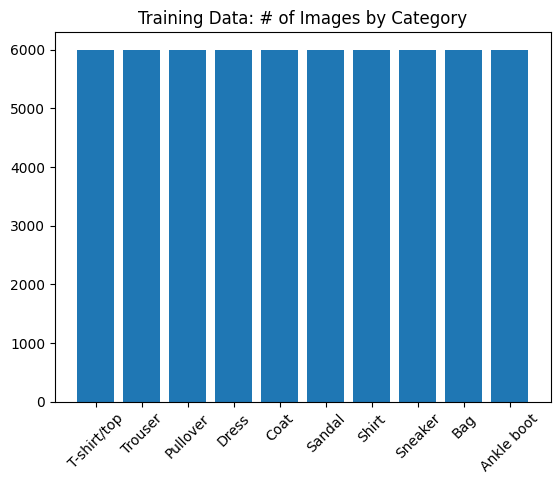

In [3]:
# Load in training dataset

# kind= to the value at front of file name (output)= images,labels
X_train, y_train = mnist_reader.load_mnist('data/',kind='train')

# View training X dataset shape
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

# View train y dataset shape/values
print((np.unique(y_train)))
print(len(image_cats))
values, counts = np.unique(y_train, return_counts=True)
print(list(zip(values,counts)))

plt.title('Training Data: # of Images by Category')
plt.bar(image_cats, counts)
plt.xticks(image_cats, rotation=45)
plt.show()


Rows: 10000, columns: 784
[0 1 2 3 4 5 6 7 8 9]
[(0, 1000), (1, 1000), (2, 1000), (3, 1000), (4, 1000), (5, 1000), (6, 1000), (7, 1000), (8, 1000), (9, 1000)]


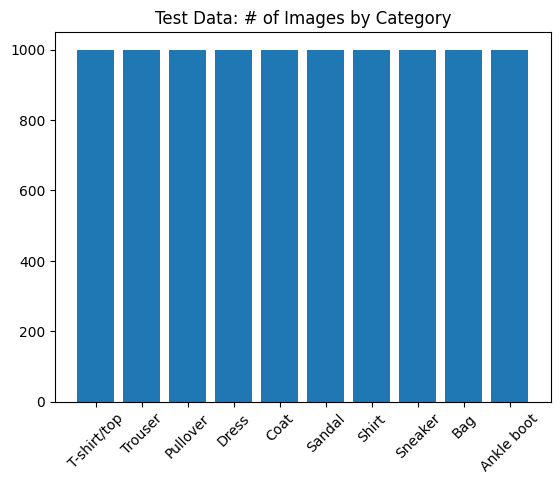

In [4]:
# Load in test datset

# kind= to the value at front of file name (output)= images,labels
X_test, y_test = mnist_reader.load_mnist('data/',kind='t10k')

# View training X dataset shape
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

# View train y dataset shape/values
print((np.unique(y_test)))
values, counts = np.unique(y_test, return_counts=True)

print(list(zip(values,counts)))

plt.title('Test Data: # of Images by Category')
plt.bar(image_cats, counts)
plt.xticks(image_cats, rotation= 45)
plt.show()

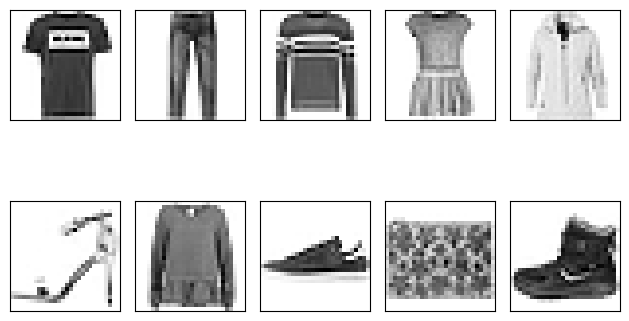

In [5]:
# VISUALIZE EACH OF THE CLOTHING CATEGORIES

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

# plt.savefig('./outputs/mnist_cat_all.png', dpi=300)
plt.show()

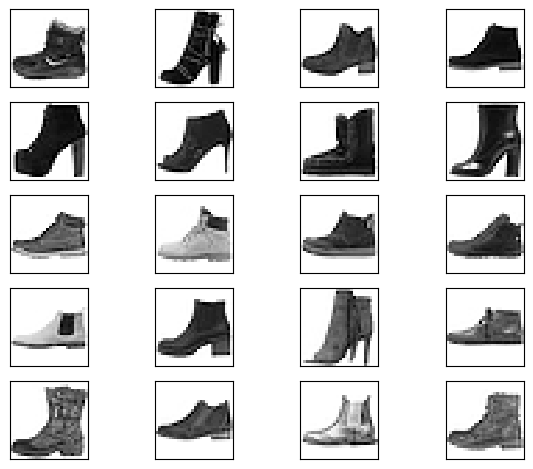

In [6]:
# VISUALIZE 20 DIFFERENT VARIATIONS OF Ankle Boots (index: 9)

fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = X_train[y_train == 9][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./outputs/mnist_cat_9.png', dpi=300)
plt.show()

# Multilayer Perceptron Neural Network (MLP NN or Multilayer ANN)

In [7]:
import multiprocessing as mp


In [8]:
# Import our created MLP neural net model from utils folder

nn = mlp.NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=100, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)

In [9]:
start = time.time()

nn.fit(X_train, y_train, print_progress=True)

end = time.time()
final_time = end-start
print(final_time/60)

Epoch: 100/100

0.8879102786382039


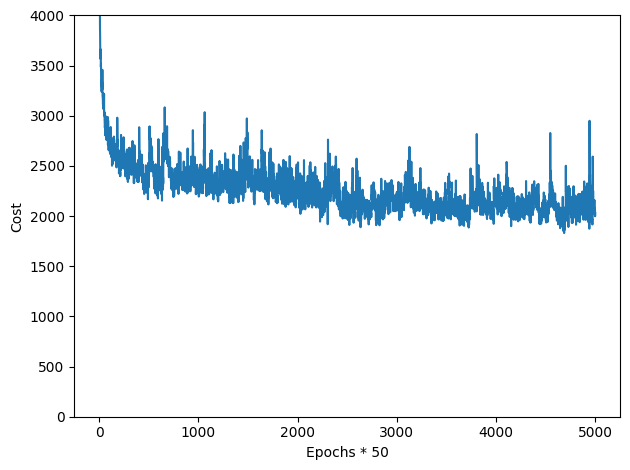

In [10]:
# ROUGH PLOT FOR EACH OF THE 50 BATCH RUNS

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 4000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [11]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

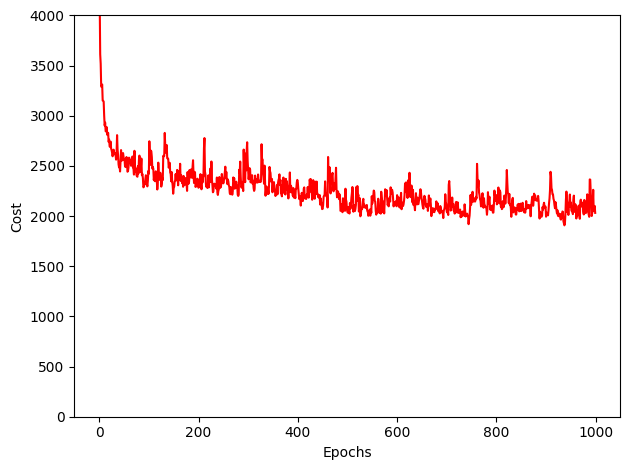

In [12]:
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 4000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig('./figures/cost2.png', dpi=300)
plt.show()

In [13]:
# Create a df to track scores of all models

model_name = []
model_score = []
model_precision = []
model_recall = []
model_f1 = []
model_time = []

In [14]:
# Check accuraccy but method of doing so depends on python version

y_train_pred = nn.predict(X_train)

if sys.version_info < (3, 0):
    acc = (np.sum(y_train == y_train_pred, axis=0)).astype('float') / X_train.shape[0]
else:
    acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))


Training accuracy: 73.71%


In [15]:
y_test_pred = nn.predict(X_test)

if sys.version_info < (3, 0):
    acc = (np.sum(y_test == y_test_pred, axis=0)).astype('float') / X_test.shape[0]
else:
    acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 72.50%


In [16]:
acc_nn = accuracy_score(y_test_pred,y_test)
cf_nn = classification_report(y_test_pred,y_test, output_dict=True)
cm_nn = confusion_matrix (y_test_pred,y_test)

print(acc_nn)
print(classification_report(y_test_pred,y_test))
print(cm_nn)

model_name.append('MLP Neural Network')
model_score.append(acc_nn)
model_precision.append(cf_nn['weighted avg']['precision'])
model_recall.append(cf_nn['weighted avg']['recall'])
model_f1.append(cf_nn['weighted avg']['f1-score'])
model_time.append(final_time/60)

0.725
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       868
           1       0.89      0.98      0.93       912
           2       0.53      0.59      0.56       901
           3       0.91      0.62      0.74      1448
           4       0.48      0.56      0.51       852
           5       0.81      0.84      0.82       958
           6       0.37      0.41      0.39       888
           7       0.77      0.88      0.82       875
           8       0.94      0.84      0.89      1109
           9       0.87      0.73      0.80      1189

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.75      0.72      0.73     10000

[[693   7  12  11   1   1 142   0   1   0]
 [  5 891   3  11   1   0   1   0   0   0]
 [ 35  14 534  11 163   0 130   0  14   0]
 [171  73  18 905 116   0 153   0  11   1]
 [  3   6 217   7 476   0 141   0   2   0]
 [  0   0   0   0   

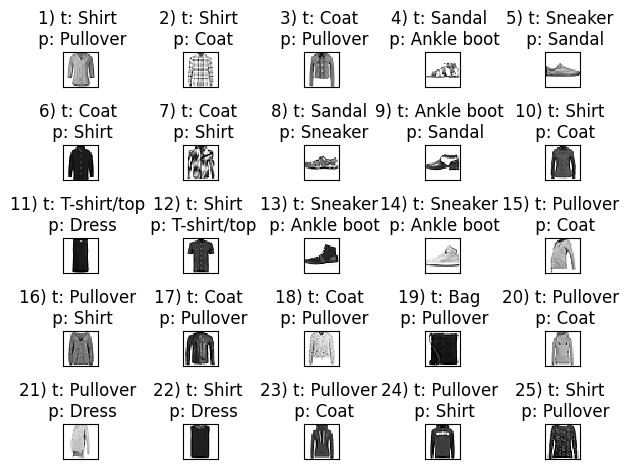

In [17]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %s \n p: %s' % (i+1, image_cats[correct_lab[i]], image_cats[miscl_lab[i]]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./outputs/mnist_miscl.png', dpi=300)
plt.show()

In [18]:
# nn_check = mlp.MLPGradientCheck(n_output=10, 
#                             n_features=X_train.shape[1], 
#                             n_hidden=10, 
#                             l2=0.0, 
#                             l1=0.0, 
#                             epochs=100, 
#                             eta=0.001,
#                             alpha=0.0,
#                             decrease_const=0.0,
#                             minibatches=1, 
#                             shuffle=False,
#                             random_state=1)

In [19]:

# nn_check.fit(X_train, y_train, print_progress=True)

In [20]:
# # ACCURACY WITH GRADIENT CHECK

# y_test_pred = nn_check.predict(X_test)

# if sys.version_info < (3, 0):
#     acc = (np.sum(y_test == y_test_pred, axis=0)).astype('float') / X_test.shape[0]
# else:
#     acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

# print('Test accuracy: %.2f%%' % (acc * 100))

# Sklearn 2darray models

## Random Forest

In [21]:
rf = RandomForestClassifier()

random_grid = {'max_depth':[3,5,10,20,40,70,100,None],
              'n_estimators':[10,100,200,400],
              'min_samples_leaf':[1,2,4],
              'min_samples_split':[1,2,5,10]
            }

# normally higher levels of iterations but testing now
rf_random = RandomizedSearchCV(rf, param_distributions=random_grid, n_iter=5, scoring='accuracy', n_jobs=-1, cv=3, verbose=1, random_state=22)

start = time.time()

model_random = rf_random.fit(X_train,y_train)

end = time.time()
final_time = end-start
print(final_time/60)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
5.8546577056248985


In [22]:

model_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 70}

In [23]:

model=RandomForestClassifier(n_jobs=-1,
                            min_samples_split=5,
                            min_samples_leaf=1,
                            max_features='auto',
                            max_depth=70,
                            n_estimators=400
                            )


start = time.time()

model.fit(X_train,y_train)

end = time.time()
final_time = end-start
print(final_time/60)


c:\Users\mcfad\Documents\School\2023 Big Data\Fashion-MNIST\venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


1.3442770481109618


In [24]:
y_pred = model.predict(X_test)
y_pred

acc_rf = accuracy_score(y_pred,y_test)
cf_rf = classification_report(y_pred,y_test, output_dict=True)
cm_rf = confusion_matrix (y_pred,y_test)

print(acc_rf)
print(classification_report(y_pred,y_test))
print(cm_rf)

model_name.append('Random Forest')
model_score.append(acc_rf)
model_precision.append(cf_rf['weighted avg']['precision'])
model_recall.append(cf_rf['weighted avg']['recall'])
model_f1.append(cf_rf['weighted avg']['f1-score'])
model_time.append(final_time/60)


0.8774
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1040
           1       0.96      0.99      0.98       967
           2       0.80      0.77      0.79      1038
           3       0.91      0.87      0.89      1041
           4       0.83      0.78      0.80      1062
           5       0.96      0.98      0.97       979
           6       0.59      0.71      0.65       832
           7       0.95      0.92      0.94      1031
           8       0.97      0.96      0.96      1017
           9       0.94      0.95      0.95       993

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[855   3  11  18   0   0 153   0   0   0]
 [  0 962   0   2   0   0   1   0   2   0]
 [ 11   2 801   8  85   0 125   0   6   0]
 [ 32  22  10 908  35   1  31   0   2   0]
 [  4   4 115  28 827   0  79   0   5   0]
 [  1   0   0   0  

In [25]:
scores_dict = {'name':model_name,'accuracy':model_score,'precision':model_precision,'recall':model_recall,'F1':model_f1, 'runtime': model_time}
score_df = pd.DataFrame.from_dict(scores_dict)
print(score_df)

                 name  accuracy  precision  recall        F1   runtime
0  MLP Neural Network    0.7250   0.745803  0.7250  0.729315  0.887910
1       Random Forest    0.8774   0.881513  0.8774  0.878755  1.344277


## K-Nearest Neighbors (KNN)

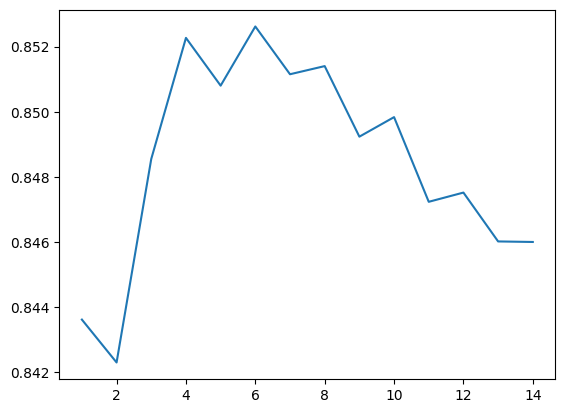

In [26]:
k_values = [i for i in range (1,15)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=3, n_jobs=-1)
    scores.append(np.mean(score))

plt.plot(k_values,scores)

In [27]:
# Accuracy seemed to peak at 4 & 6 so will go wit 4 to avoid overfitting
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)


start = time.time()

knn.fit(X_train,y_train)


end = time.time()
final_time = end-start
print(final_time/60)

y_pred_knn = knn.predict(X_test)


0.00021607875823974608


In [28]:
acc_knn = accuracy_score(y_pred_knn,y_test)
cf_knn = classification_report(y_pred_knn,y_test, output_dict=True)
cm_knn = confusion_matrix (y_pred_knn,y_test)

print(acc_knn)
print(classification_report(y_pred_knn,y_test))
print(cm_knn)

model_name.append('K-Nearest Neighbors')
model_score.append(acc_knn)
model_precision.append(cf_knn['weighted avg']['precision'])
model_recall.append(cf_knn['weighted avg']['recall'])
model_f1.append(cf_knn['weighted avg']['f1-score'])
model_time.append(final_time/60)

0.8577
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1176
           1       0.97      0.99      0.98       984
           2       0.83      0.71      0.76      1176
           3       0.87      0.90      0.89       960
           4       0.74      0.80      0.77       928
           5       0.85      0.99      0.92       861
           6       0.55      0.68      0.60       804
           7       0.97      0.88      0.93      1098
           8       0.95      0.98      0.97       970
           9       0.96      0.92      0.94      1043

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

[[886   8  27  48   4   2 198   0   3   0]
 [  1 971   2   7   1   0   2   0   0   0]
 [ 20   3 831  15 151   0 143   0  13   0]
 [ 14  10  11 868  32   0  22   0   3   0]
 [  3   4  69  25 743   0  79   0   5   0]
 [  1   0   0   0  

In [29]:
scores_dict = {'name':model_name,'accuracy':model_score,'precision':model_precision,'recall':model_recall,'F1':model_f1, 'runtime': model_time}
score_df = pd.DataFrame.from_dict(scores_dict)
print(score_df)

                  name  accuracy  precision  recall        F1   runtime
0   MLP Neural Network    0.7250   0.745803  0.7250  0.729315  0.887910
1        Random Forest    0.8774   0.881513  0.8774  0.878755  1.344277
2  K-Nearest Neighbors    0.8577   0.865751  0.8577  0.859051  0.000216


## Decision Tree

In [30]:
dtc=DecisionTreeClassifier()


start = time.time()


dtc.fit(X_train,y_train)

end = time.time()
final_time = end-start
print(final_time/60)




0.6364353418350219


In [31]:
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [32]:
acc_dtc = accuracy_score(y_pred_dtc,y_test)
cf_dtc = classification_report(y_pred_dtc,y_test, output_dict=True)
cm_dtc = confusion_matrix (y_pred_dtc,y_test)

print(acc_dtc)
print(classification_report(y_pred_dtc,y_test))
print(cm_dtc)

model_name.append('Decision Tree')
model_score.append(acc_dtc)
model_precision.append(cf_dtc['weighted avg']['precision'])
model_recall.append(cf_dtc['weighted avg']['recall'])
model_f1.append(cf_dtc['weighted avg']['f1-score'])
model_time.append(final_time/60)

0.792
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       954
           1       0.95      0.95      0.95       995
           2       0.66      0.64      0.65      1035
           3       0.79      0.81      0.80       982
           4       0.63      0.66      0.64       960
           5       0.88      0.91      0.90       967
           6       0.56      0.53      0.54      1060
           7       0.89      0.87      0.88      1022
           8       0.91      0.91      0.91      1003
           9       0.92      0.90      0.91      1022

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[727   4  20  46  11   0 135   0   9   2]
 [  4 949   2  22   5   2  10   0   1   0]
 [ 33   4 659  20 166   0 135   0  18   0]
 [ 44  25  19 792  55   0  39   0   8   0]
 [ 10   5 152  56 629   0  96   0  11   1]
 [  4   0   2   1   

In [33]:
scores_dict = {'name':model_name,'accuracy':model_score,'precision':model_precision,'recall':model_recall,'F1':model_f1, 'runtime': model_time}
score_df = pd.DataFrame.from_dict(scores_dict)
print(score_df)

                  name  accuracy  precision  recall        F1   runtime
0   MLP Neural Network    0.7250   0.745803  0.7250  0.729315  0.887910
1        Random Forest    0.8774   0.881513  0.8774  0.878755  1.344277
2  K-Nearest Neighbors    0.8577   0.865751  0.8577  0.859051  0.000216
3        Decision Tree    0.7920   0.791253  0.7920  0.791439  0.636435


## Gaussian Naive Bayes (GNB)

'''Bernoulli Naive Bayes : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

Multinomial Naive Bayes : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

Gaussian Naive Bayes : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.'''

In [34]:
nb=GaussianNB()


start = time.time()

nb.fit(X_train,y_train)

end = time.time()
final_time = end-start
print(final_time/60)


0.009198141098022462


In [35]:
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([7, 4, 1, ..., 3, 1, 7], dtype=uint8)

In [36]:
acc_nb = accuracy_score(y_pred_nb,y_test)
cf_nb = classification_report(y_pred_nb,y_test, output_dict=True)
cm_nb = confusion_matrix (y_pred_nb,y_test)

print(acc_nb)
print(classification_report(y_pred_nb,y_test))
print(cm_nb)

model_name.append('Gaussian Naive Bayes')
model_score.append(acc_nb)
model_precision.append(cf_nb['weighted avg']['precision'])
model_recall.append(cf_nb['weighted avg']['recall'])
model_f1.append(cf_nb['weighted avg']['f1-score'])
model_time.append(final_time/60)

0.5856
              precision    recall  f1-score   support

           0       0.59      0.81      0.68       720
           1       0.94      0.64      0.76      1474
           2       0.32      0.59      0.42       550
           3       0.55      0.44      0.49      1226
           4       0.78      0.38      0.51      2068
           5       0.28      0.93      0.43       300
           6       0.04      0.32      0.07       125
           7       0.99      0.51      0.67      1956
           8       0.71      0.83      0.77       852
           9       0.67      0.91      0.77       729

    accuracy                           0.59     10000
   macro avg       0.59      0.64      0.56     10000
weighted avg       0.74      0.59      0.62     10000

[[586   1   7   9   0   0 117   0   0   0]
 [ 64 939  14 387  34   0  34   0   2   0]
 [ 29  14 324   6  44   1 112   0  19   1]
 [162  36  65 545 131   1 200   0  85   1]
 [110   7 545  43 779   0 435   0 149   0]
 [  0   0   0   0  

In [37]:
scores_dict = {'name':model_name,'accuracy':model_score,'precision':model_precision,'recall':model_recall,'F1':model_f1, 'runtime': model_time}
score_df = pd.DataFrame.from_dict(scores_dict)
print(score_df)

                   name  accuracy  precision  recall        F1   runtime
0    MLP Neural Network    0.7250   0.745803  0.7250  0.729315  0.887910
1         Random Forest    0.8774   0.881513  0.8774  0.878755  1.344277
2   K-Nearest Neighbors    0.8577   0.865751  0.8577  0.859051  0.000216
3         Decision Tree    0.7920   0.791253  0.7920  0.791439  0.636435
4  Gaussian Naive Bayes    0.5856   0.737544  0.5856  0.615040  0.009198


## Convolutional Neural Network (CNN)

In [38]:
X_train_cnn = X_train.copy()
X_test_cnn = X_test.copy()

In [39]:
# len(X_train_cnn)
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], 28, 28, 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], 28, 28, 1))

In [40]:
train_norm = X_train_cnn.astype('float32')/255
test_norm = X_test_cnn.astype('float32')/255


In [41]:
cnn_model = keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform', activation='relu', input_shape=[28,28,1]),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='valid', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_uniform'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(units=256, activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(units=10, activation='softmax')
                                    ])

In [42]:
''' If you want to use "categorical_crossentropy", the labels should be one-hot-encoded, can use to_categorical function in keras.utils.
 When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required. 
 The advantage of using "categorical_crossentropy" is that it can give you class probabilities, which might be useful in some cases.'''

# opt = tf.keras.optimizers.SGD(learning_rate=.001)

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [43]:
start = time.time()

cnn_model.fit(X_train_cnn,y_train, epochs=25, batch_size=32, verbose=1,validation_data=(X_test_cnn,y_test))

end = time.time()
final_time = end-start
print(final_time/60)

Epoch 1/25
1875/1875 [==============================] - 20s 10ms/step - loss: 1.4418 - accuracy: 0.6281 - val_loss: 0.6317 - val_accuracy: 0.7353
Epoch 2/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6848 - accuracy: 0.7218 - val_loss: 0.5548 - val_accuracy: 0.7784
Epoch 3/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5590 - accuracy: 0.7889 - val_loss: 0.4507 - val_accuracy: 0.8411
Epoch 4/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4782 - accuracy: 0.8267 - val_loss: 0.4147 - val_accuracy: 0.8569
Epoch 5/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4448 - accuracy: 0.8367 - val_loss: 0.3812 - val_accuracy: 0.8609
Epoch 6/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4186 - accuracy: 0.8465 - val_loss: 0.3769 - val_accuracy: 0.8671
Epoch 7/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4066 - accuracy: 0.8508 - val_loss: 0.3656 -

In [44]:
 # evaluate model
_, acc = cnn_model.evaluate(X_test_cnn,y_test)

print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8858
> 88.580


In [45]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
print(y_pred_cnn[0])

print(y_test[0])


pred_list = []
for i in y_pred_cnn:
    pred= list(i).index(max(i))
    pred_list.append(pred)


print(classification_report(pred_list,y_test))
print(accuracy_score(pred_list,y_test))

313/313 [==============================] - 1s 3ms/step
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.8001390e-12 0.0000000e+00 8.3611890e-10 1.6843772e-24 1.0000000e+00]
9
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       855
           1       0.97      1.00      0.98       970
           2       0.87      0.77      0.81      1128
           3       0.92      0.88      0.90      1037
           4       0.78      0.82      0.80       959
           5       0.97      0.98      0.98       988
           6       0.70      0.67      0.69      1036
           7       0.98      0.93      0.95      1058
           8       0.98      0.97      0.97      1007
           9       0.94      0.98      0.96       962

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

0.8858


In [46]:
acc_cnn = accuracy_score(pred_list,y_test)
cf_cnn = classification_report(pred_list,y_test, output_dict=True)
cm_cnn = confusion_matrix (pred_list,y_test)

print(acc_cnn)
print(classification_report(pred_list,y_test))
print(cm_cnn)

model_name.append('Convolution Neural Network')
model_score.append(acc_cnn)
model_precision.append(cf_cnn['weighted avg']['precision'])
model_recall.append(cf_cnn['weighted avg']['recall'])
model_f1.append(cf_cnn['weighted avg']['f1-score'])
model_time.append(final_time/60)

0.8858
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       855
           1       0.97      1.00      0.98       970
           2       0.87      0.77      0.81      1128
           3       0.92      0.88      0.90      1037
           4       0.78      0.82      0.80       959
           5       0.97      0.98      0.98       988
           6       0.70      0.67      0.69      1036
           7       0.98      0.93      0.95      1058
           8       0.98      0.97      0.97      1007
           9       0.94      0.98      0.96       962

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[758   0  16  12   2   0  65   0   2   0]
 [  1 968   0   0   0   0   1   0   0   0]
 [ 30   2 866  17 104   0 107   0   1   1]
 [ 17  18   7 915  47   0  32   0   1   0]
 [  3   2  65  19 782   0  84   0   4   0]
 [  1   0   0   0  

In [47]:
scores_dict = {'name':model_name,'accuracy':model_score,'precision':model_precision,'recall':model_recall,'F1':model_f1, 'runtime': model_time}
score_df = pd.DataFrame.from_dict(scores_dict)
print(score_df)

                         name  accuracy  precision  recall        F1   runtime
0          MLP Neural Network    0.7250   0.745803  0.7250  0.729315  0.887910
1               Random Forest    0.8774   0.881513  0.8774  0.878755  1.344277
2         K-Nearest Neighbors    0.8577   0.865751  0.8577  0.859051  0.000216
3               Decision Tree    0.7920   0.791253  0.7920  0.791439  0.636435
4        Gaussian Naive Bayes    0.5856   0.737544  0.5856  0.615040  0.009198
5  Convolution Neural Network    0.8858   0.887313  0.8858  0.885566  7.934064


# Visualization

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MLP Neural Network'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'K-Nearest Neighbors'),
  Text(3, 0, 'Decision Tree'),
  Text(4, 0, 'Gaussian Naive Bayes'),
  Text(5, 0, 'Convolution Neural Network')])

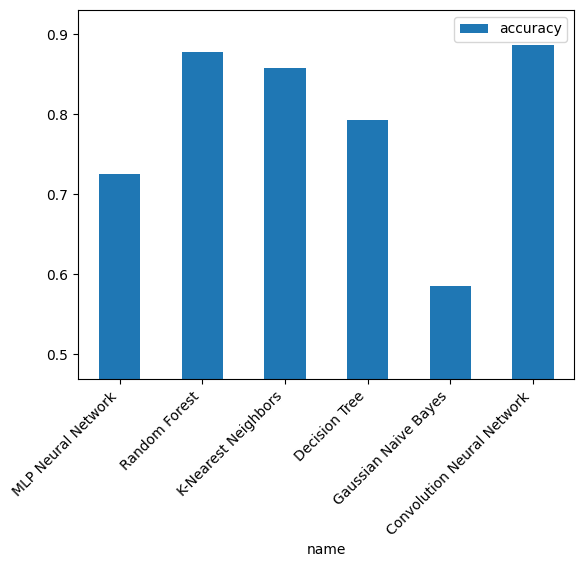

In [48]:
# View model accuracy scores
score_df.plot(x='name',y='accuracy',kind='bar')
plt.ylim(bottom=min(score_df['accuracy'])*.8)
plt.xticks(ha='right',rotation=45)

In [49]:
# Create 3D Scatter plot to view model performance
fig = px.scatter_3d(score_df, x='accuracy', y='precision', z='runtime',
              color='F1',size='recall',hover_name='name')
fig.show()

In [50]:
# Create 3D Scatter plot to view model performance
fig = px.scatter_3d(score_df, x='accuracy', y='precision', z='recall',
              color='runtime',size='F1',hover_name='name')
fig.show()